# Import various dependency

In [11]:
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import describe as ssd
from scipy.stats import norm
from scipy.stats import hypergeom
from scipy.stats import expon
from fitter import Fitter
import warnings

# Number 1 Descriptive Statistics

In [128]:
athletes_data = pd.read_csv('dataset_fifa.csv')
athletes_data.describe()
print("----------Mode----------")
athletes_data.mode(numeric_only="True")
print("----------Median----------")
athletes_data.median(numeric_only="True")
print("----------Variance----------")
athletes_data.var()
print("----------Skewness----------")
athletes_data.skew()
print("----------Kurtosis----------")
athletes_data.kurtosis()

Age
count  18207.000000
mean      25.122206
std        4.669943
min       16.000000
25%       21.000000
50%       25.000000
75%       28.000000
max       45.000000

----------Mode----------


Age
0   21

----------Median----------


Age    25.0
dtype: float64

----------Variance----------


Age    21.808365
dtype: float64

----------Skewness----------


Age    0.391764
dtype: float64

----------Kurtosis----------


Age   -0.459514
dtype: float64

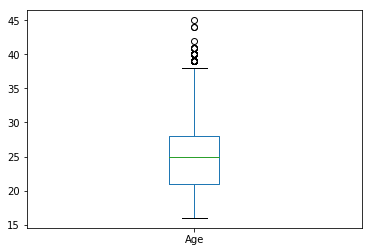

In [120]:
athletes_data.plot.box()

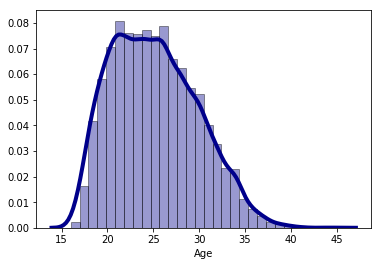

In [42]:
# Distribution plot
sns.distplot(athletes_data['Age'], hist=True, kde=True, 
             bins=30, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# 1a) Berumur kurang dari 22 tahun

In [167]:
percentage = ss.norm.cdf(22.5,athletes_data.mean(), athletes_data.std())
smallerThan22 = athletes_data[athletes_data['Age']<22].count()
newSmaller22 = math.floor(percentage[0]*1000)
total = smallerThan22+newSmaller22
print('Orang baru yang lebih kecil dari 22: ' + str(newSmaller22))
print('Total orang yang lebih kecil dari 22: ' + str(total[0]))

Orang baru yang lebih kecil dari 22: 287
Total orang yang lebih kecil dari 22: 5037


# 1b) Berumur lebih dari 40 tahun

In [92]:
percentage40 = 1 - ss.norm.cdf(40.5,athletes_data.mean(), athletes_data.std())
newGreater40 = math.floor(percentage40[0]*1000)
greaterThan40 = athletes_data[athletes_data['Age']>40].count()
total40 = newSmaller40 + greaterThan40
print('Orang baru yang lebih besar dari 40: ' + str(newGreater40))
print('Total orang yang lebih besar dari 40: ' + str(total40[0]))

Orang baru yang lebih besar dari 40: 0
Total orang yang lebih besar dari 40: 9


### Data yang diberikan bersifat diskrit sehingga distribusi yang dapat digunakan adalah binomial. Binomial dipilih karena kasus ini memenuhi syarat binomial, misalnya data satu sama lain indipendent. Selain itu distribusi tersebut dipilih karena distribusi data yang relatif merata sekitar rataan data.

# Number 3 Descriptive Statistics

In [129]:
data_belanja = pd.read_csv('black_friday.csv', names = ['expenses'])
print('================================')
print('Maximum value      : ', end='')
print(data_belanja['expenses'].max())
print('Minimum value      : ', end='')
print(data_belanja['expenses'].min())
print('Mean value         : ', end='')
print(data_belanja['expenses'].mean())
print('Mode value         : ', end='')
print(data_belanja['expenses'].mode().values[0])
print('Median value       : ', end='')
print(data_belanja['expenses'].median())
print('Variance           : ', end='')
print(data_belanja['expenses'].var())
print('Standard deviation : ', end='')
print(data_belanja['expenses'].std())
print('Skewness           : ', end='')
print(data_belanja['expenses'].skew())
print('Kurtosis           : ', end='')
print(data_belanja['expenses'].kurt())

Maximum value      : 23961
Minimum value      : 185
Mean value         : 9333.859852635065
Mode value         : 6855
Median value       : 8062.0
Variance           : 24810581.48601374
Standard deviation : 4981.022132656483
Skewness           : 0.6242797316083074
Kurtosis           : -0.34312137256836284


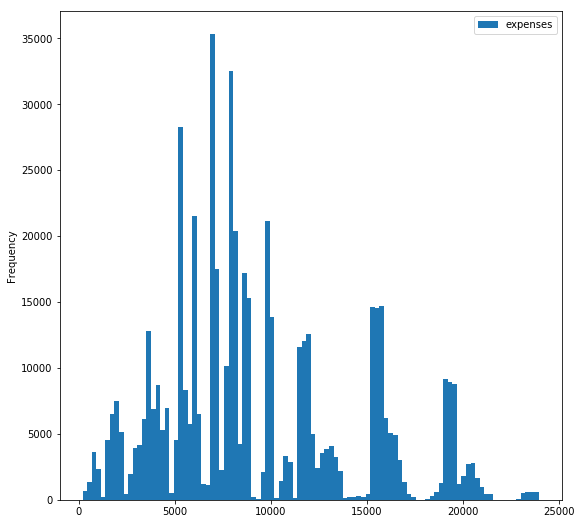

In [192]:
array = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000]
data_belanja[['expenses']].plot(kind = 'hist', bins=100, figsize = (9, 9))

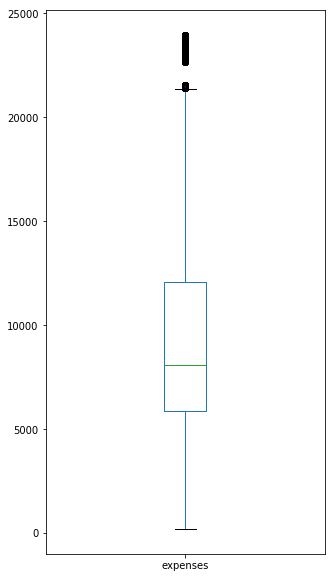

In [166]:
data_belanja.plot(kind = 'box', figsize = (5, 10))

# 3a) i) Miskin

In [201]:
round(len(data_belanja[data_belanja['expenses'] < 1000]) / len (data_belanja) * 250)

3

# 3a) ii) Kaya

In [202]:
round(len(data_belanja[data_belanja['expenses'] > 10000]) / len (data_belanja) * 250)

87

# 3a) iii) Crazy Rich

In [203]:
round(len(data_belanja[data_belanja['expenses'] > 20000]) / len (data_belanja) * 250)

6

# 3b) i) Galaxy Fold

In [212]:
round(len(data_belanja[(data_belanja['expenses']>=1980) & (data_belanja['expenses'] <= 2000)]) / len (data_belanja) * 1000)

1

# 3b) ii) Macbook Pro

In [213]:
round(len(data_belanja[(data_belanja['expenses']>=2707) & (data_belanja['expenses'] <= 2897)]) / len (data_belanja) * 1000)

7

### Data yang diberikan bersifat diskrit sehingga distribusi yang dapat digunakan adalah distribusi untuk data diskrit. Binomial dipilih karena kasus ini memenuhi syarat binomial, misalnya data satu sama lain indipendent. Hal ini dikarenakan data suatu pembeli pada blackfriday tidak mempengaruhi pembeli yang lain. Serta pada binomial kita membagi 2 kemungkinan hasil dan hal ini pula yang kita lakukan untuk menjawab pertanyaan yang diberikan.

# Number 4 Descriptive Statistics

In [244]:
data_crypto = pd.read_csv('crypto.csv', names = ['price'])

In [245]:
print('================================')
print('Maximum value      : ', end='')
print(data_crypto['price'].max())
print('Minimum value      : ', end='')
print(data_crypto['price'].min())
print('Mean value         : ', end='')
print(data_crypto['price'].mean())
print('Mode value         : ', end='')
print(data_crypto['price'].mode().values[0])
print('Median value       : ', end='')
print(data_crypto['price'].median())
print('Variance           : ', end='')
print(data_crypto['price'].var())
print('Standard deviation : ', end='')
print(data_crypto['price'].std())
print('Skewness           : ', end='')
print(data_crypto['price'].skew())
print('Kurtosis           : ', end='')
print(data_crypto['price'].kurt())

Maximum value      : 2383502.5
Minimum value      : 2.9249999999999997e-09
Mean value         : 203.01814563577602
Mode value         : 2e-06
Median value       : 0.0097335
Variance           : 75320415.21220845
Standard deviation : 8678.733502776107
Skewness           : 118.23960755632972
Kurtosis           : 22297.470842872517


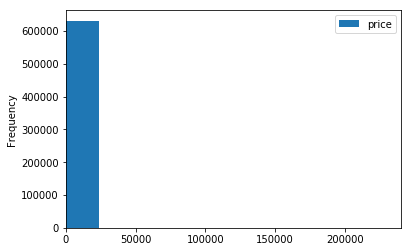

In [248]:
data_crypto.plot(kind='hist', xlim=(0,240000), bins=100)

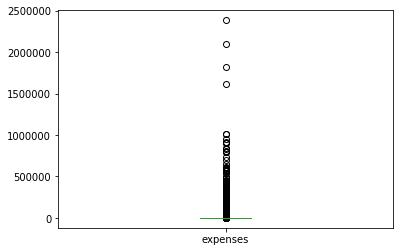

In [133]:
data_crypto.plot.box()

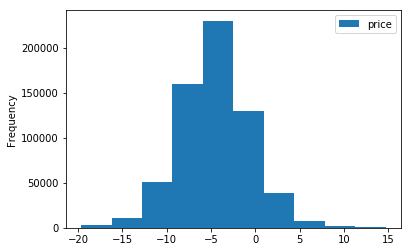

In [249]:
data_crypt_log = np.log(data_crypto)
data_crypt_log.plot.hist()

In [251]:
std_n = data_crypto_log.std()
mean_n = data_crypto_log.mean()

# 4a) i) Kurang dari 0.177013

In [263]:
round(1000*ss.norm.cdf(np.log(0.177013),mean_n, std_n)[0])

767.0

# 4a) ii) Lebih dari 177.013

In [262]:
round(1000*(1-ss.norm.cdf(np.log(177.013),mean_n, std_n)[0]))

7.0

# 4b) i) Lebih dari 0.013

In [261]:
1-ss.norm.cdf(np.log(0.013),mean_n, std_n)[0]

0.4724174695697392

# 4b) ii) Kurang dari 17.7

In [260]:
ss.norm.cdf(np.log(17.7),mean_n, std_n)[0]

0.970672397230195

### Data yang digunakan bersifat kontigu sehingga distribusi yang digunakan adalah distribusi yang kontigu. Data memiliki distribusi yang unik disertai data pencilan yang sangat banyak. Hal ini cukup mengganggu fungsi distribusi untuk dapat bekerja dengan optimum. Distribusi yang dipilih adalah jenis lognormal karena dapat mengakomodasi grafik distribusi yang unik dengan pengaturan parameter yang pas.

# Number 5 Descriptive Statistics

In [4]:
medal_data = pd.read_csv('dataset_athletes.csv')

medal_data.describe()
medal_data.mode(numeric_only="True")
medal_data.median(numeric_only="True")
medal_data.var()
medal_data.skew()
medal_data.kurtosis()

Medal
count  134731.000000
mean        0.295277
std         0.724716
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        28.000000

Medal
0      0

Medal    0.0
dtype: float64

Medal    0.525213
dtype: float64

Medal    4.819999
dtype: float64

Medal    51.562526
dtype: float64

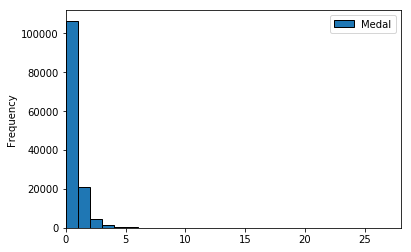

In [44]:
medal_data[['Medal']].plot(kind='Hist', xlim=(0,28), edgecolor = 'black', bins=28)

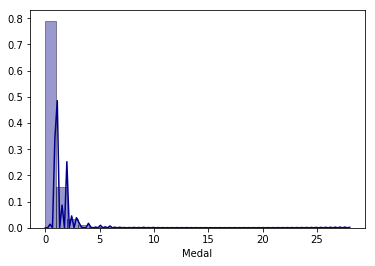

In [27]:
# Distribution plot
sns.distplot(medal_data['Medal'], hist=True, 
             bins=28, color = 'darkblue',
             hist_kws={'edgecolor':'black'})

# 5a) i) Tepat 0 medali

In [221]:
len(medal_data[medal_data['Medal'] == 0]) / len(medal_data)

0.7906792052311643

# 5a) ii) Lebih dari 10 medali

In [222]:
len(medal_data[medal_data['Medal'] > 10]) / len(medal_data)

0.00015586613325812174

# 5a) iii) Tepat 3 medali

In [225]:
len(medal_data[medal_data['Medal'] == 3]) / len(medal_data)

0.01027974259821422

# 5a) iii) 1 atau 5 medali

In [228]:
len(medal_data[(medal_data['Medal'] == 1) | (medal_data['Medal'] == 5)]) / len(medal_data)

0.1588424341836697

# 5b) Confidence interval 95%

In [268]:
# z0.025 = 1.96
fault = 1.96 * medal_data['Medal'].std() / np.sqrt(medal_data['Medal'].count())
lowerBound = medal_data['Medal'].mean() - fault
upperBound = medal_data['Medal'].mean() + fault
print(lowerBound , upperBound)

0.29140744161222804 0.29914707071232977


#### Data yang diberikan bersifat diskrit sehingga distribusi yang dapat digunakan adalah distribusi yang cocok data diskrit. Binomial dipilih karena kasus ini memenuhi syarat binomial, misalnya perolehan medali satu peserta tidak mempengaruhi perolehan medali kumulatif peserta lainnya. Selain itu distribusi tersebut dipilih karena aplikasi distribusi tersebut cocok untuk data yang true atau false yang mana cocok untuk menjawab pertanyaan soal yang diberikan.